In [1]:
# Dependencies
import hvplot.pandas
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Read states_popularity.csv and create it as a Dataframe
states_popularity = pd.read_csv('states_popularity.csv')
states_popularity_df = pd.DataFrame(states_popularity)
states_popularity_df.head()

,state,name,commercial_popularity,service_popularity,religion_popularity,tourism_popularity,production_popularity,leisure_popularity
0,AK,Alaska,0.162537,0.052005,0.195715,0.068649,0.023764,0.059854
1,AL,Alabama,0.000000,0.765357,0.000000,0.306351,0.433248,0.262817
2,AR,Arkansas,0.000000,0.000000,0.742974,0.770750,0.760664,0.760625
3,AZ,Arizona,0.000000,0.000000,0.000000,0.000000,0.090190,0.155441
4,CA,California,0.821187,0.000000,0.000000,1.076621,0.000000,0.000000


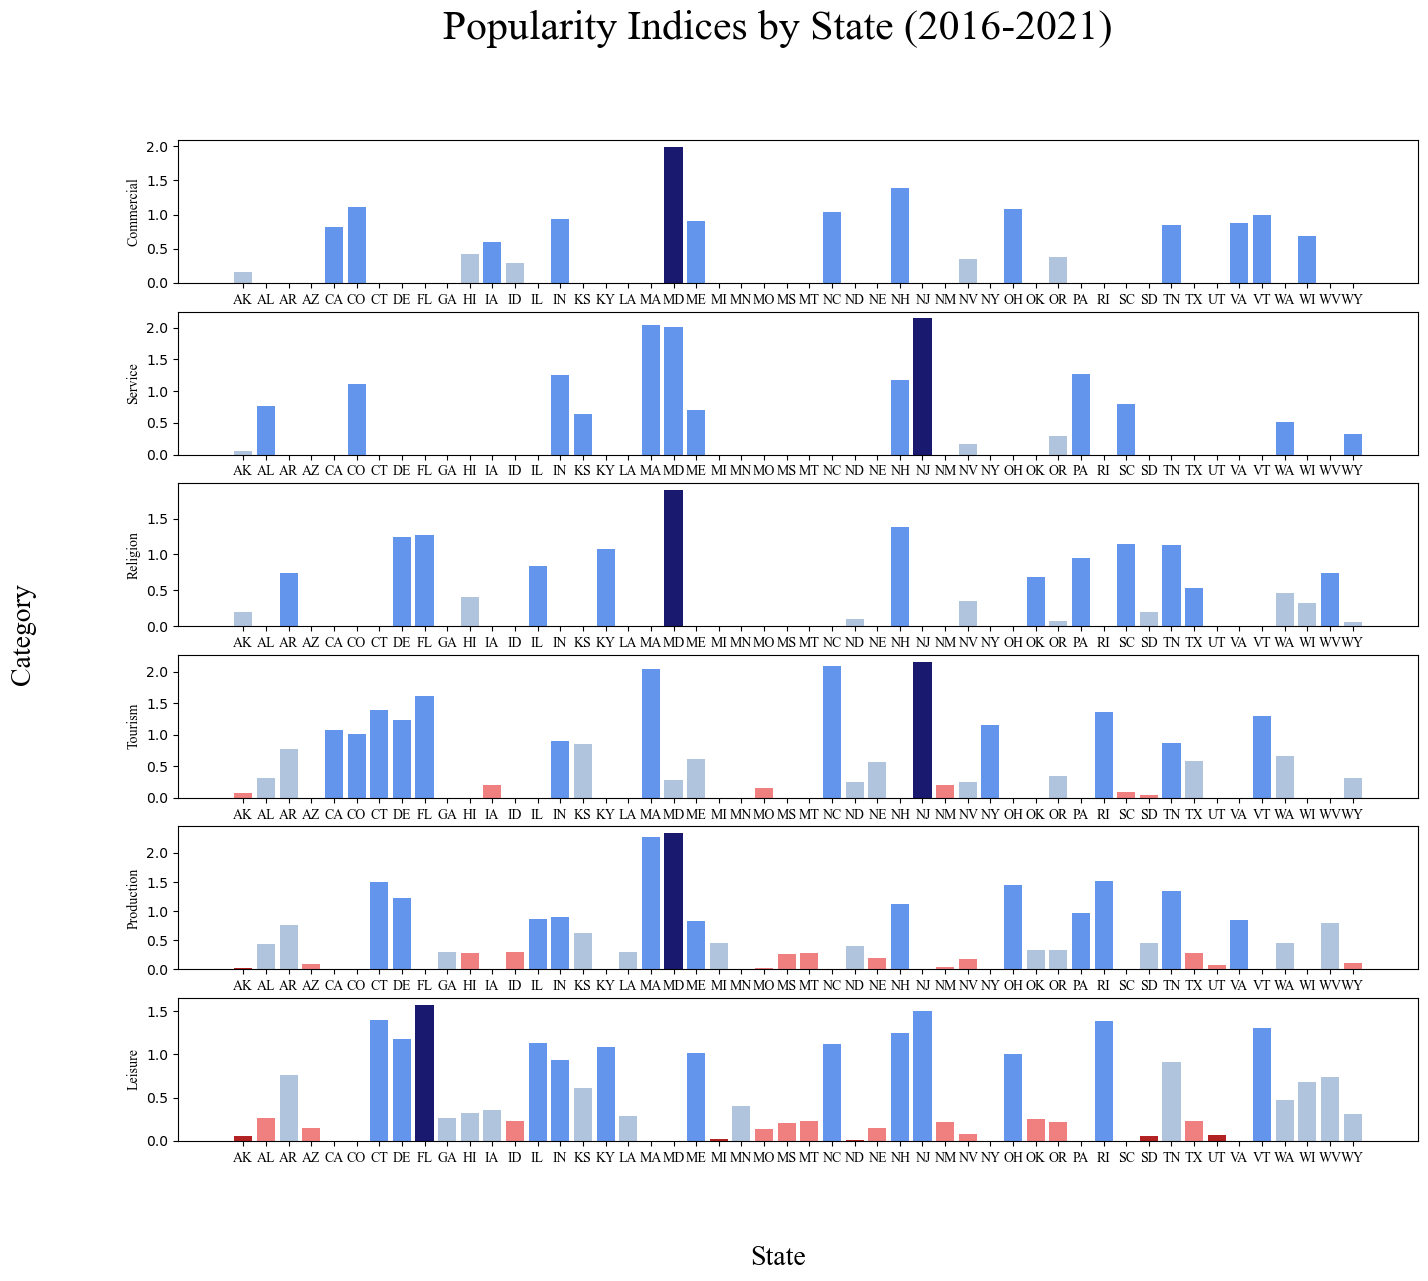

In [158]:
# Create subplots for all categories
fig, ax = plt.subplots(6, figsize=(16,13))
font_tnr = {'fontname': 'Times New Roman'}
fig.suptitle('Popularity Indices by State (2016-2021)', fontsize=30, **font_tnr)
fig.supxlabel('State', fontsize=20, **font_tnr)
fig.supylabel('Category', fontsize=20, **font_tnr)

# Graph the popularity index for each category on the subplot
ax_count = 0
x_axis = np.arange(len(states_popularity_df['state']))
for pop in states_popularity_df.columns[2:]:
    
    # Distinguish the color by quartiles and highlight the maximum value
    quartiles = states_popularity_df[pop].quantile([0.25,0.5,0.75])
    colors = ['midnightblue' if v == states_popularity_df[pop].max() else 'cornflowerblue' if ((v >= quartiles[0.75]) & (v < states_popularity_df[pop].max())) else 'lightsteelblue' if ((v >= quartiles[0.5]) & (v < quartiles[0.75])) else 'lightcoral' if ((v >= quartiles[0.25]) & (v < quartiles[0.5])) else 'firebrick' for v in states_popularity_df[pop]]
    ax[ax_count].bar(x_axis, states_popularity_df[pop], color=colors)
    
    # Format and label the figure
    tick_locations = [value for value in x_axis]
    ax[ax_count].set_xticks(tick_locations)
    ax[ax_count].set_xticklabels(states_popularity_df['state'], **font_tnr)
    ax[ax_count].set_ylabel(pop.replace("_popularity", "").title(), **font_tnr)

    ax_count += 1

# Save the figure to Figures folder
plt.savefig('Figures/popularity_by_state.png')
plt.show()

In [4]:
# Read states.csv and merge with popularity Dataframe
states = pd.read_csv('../states.csv')
states_df = pd.DataFrame(states)
states_popularity_loc_df = states_popularity_df.merge(states_df, on=['name', 'state'])
states_popularity_loc_df.head()

,state,name,commercial_popularity,service_popularity,religion_popularity,tourism_popularity,production_popularity,leisure_popularity,latitude,longitude
0,AK,Alaska,0.162537,0.052005,0.195715,0.068649,0.023764,0.059854,63.588753,-154.493062
1,AL,Alabama,0.000000,0.765357,0.000000,0.306351,0.433248,0.262817,32.318231,-86.902298
2,AR,Arkansas,0.000000,0.000000,0.742974,0.770750,0.760664,0.760625,35.201050,-91.831833
3,AZ,Arizona,0.000000,0.000000,0.000000,0.000000,0.090190,0.155441,34.048928,-111.093731
4,CA,California,0.821187,0.000000,0.000000,1.076621,0.000000,0.000000,36.778261,-119.417932


# Map for Each Category

## Commercial

In [8]:
# Commercial Map
commercial_map = states_popularity_loc_df.hvplot.points(
"longitude",
"latitude",
geo = True,
tiles = "OSM",
frame_width = 500,
frame_height = 400,
size = 'commercial_popularity',
scale = 20,
color = "name")
commercial_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (name,commercial_popularity)

## Service

In [9]:
# Service Map
service_map = states_popularity_loc_df.hvplot.points(
"longitude",
"latitude",
geo = True,
tiles = "OSM",
frame_width = 500,
frame_height = 400,
size = 'service_popularity',
scale = 20,
color = "name")
service_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (name,service_popularity)

## Religion

In [10]:
# Religion Map
religion_map = states_popularity_loc_df.hvplot.points(
"longitude",
"latitude",
geo = True,
tiles = "OSM",
frame_width = 500,
frame_height = 400,
size = 'religion_popularity',
scale = 20,
color = "name")
religion_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (name,religion_popularity)

## Tourism

In [11]:
# Tourism Map
tourism_map = states_popularity_loc_df.hvplot.points(
"longitude",
"latitude",
geo = True,
tiles = "OSM",
frame_width = 500,
frame_height = 400,
size = 'tourism_popularity',
scale = 20,
color = "name")
tourism_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (name,tourism_popularity)

## Production

In [12]:
# Production Map
production_map = states_popularity_loc_df.hvplot.points(
"longitude",
"latitude",
geo = True,
tiles = "OSM",
frame_width = 500,
frame_height = 400,
size = 'production_popularity',
scale = 20,
color = "name")
production_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (name,production_popularity)

## Leisure

In [13]:
# Leisure Map
leisure_map = states_popularity_loc_df.hvplot.points(
"longitude",
"latitude",
geo = True,
tiles = "OSM",
frame_width = 500,
frame_height = 400,
size = 'leisure_popularity',
scale = 20,
color = "name")
leisure_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (name,leisure_popularity)

In [64]:
# Read avg_by_state.csv and merge with popularity_loc Dataframe
states_avg = pd.read_csv('../avg_by_state.csv')
states_avg_df = pd.DataFrame(states_avg)

# Format Dataframe for same column name and area values to int
states_avg_df.rename(columns={"State": "name"}, 
                               inplace=True)
states_avg_df.drop('Unnamed: 0', axis=1, inplace=True)
states_complete_df = states_popularity_loc_df.merge(states_avg_df, on='name')
states_complete_df.head()

,state,name,commercial_popularity,service_popularity,religion_popularity,tourism_popularity,production_popularity,leisure_popularity,latitude,longitude,Average Total Population,Average Total Migration,Average Employable Civilians,Average Employed Civilians,Average Employed Rate (%),Average Median Household Income,Average Per Capita Income
0,AK,Alaska,0.162537,0.052005,0.195715,0.068649,0.023764,0.059854,63.588753,-154.493062,737324.17,31675.00,375521.00,347846.83,46.83,77165.00,36374.50
1,AL,Alabama,0.000000,0.765357,0.000000,0.306351,0.433248,0.262817,32.318231,-86.902298,4887287.67,110104.33,2240805.17,2094201.50,42.50,49538.33,27441.33
2,AR,Arkansas,0.000000,0.000000,0.742974,0.770750,0.760664,0.760625,35.201050,-91.831833,2992439.83,72429.50,1371577.00,1293242.00,42.67,46845.00,26162.17
3,AZ,Arizona,0.000000,0.000000,0.000000,0.000000,0.090190,0.155441,34.048928,-111.093731,6964795.67,257898.17,3284834.67,3072755.50,43.50,57908.33,30265.50
4,CA,California,0.821187,0.000000,0.000000,1.076621,0.000000,0.000000,36.778261,-119.417932,39145114.33,498871.17,19670558.67,18299154.17,46.33,73364.00,36069.00


R-squared: 0.6362% of the variability observed in Commercial is explained by the regression model.
--------------------------------------------------------------------------------
R-squared: 0.0037% of the variability observed in Service is explained by the regression model.
--------------------------------------------------------------------------------
R-squared: 2.1894% of the variability observed in Religion is explained by the regression model.
--------------------------------------------------------------------------------
R-squared: 7.3784% of the variability observed in Tourism is explained by the regression model.
P-value of 0.0564 for Tourism is arguable!
--------------------------------------------------------------------------------
R-squared: 1.7523% of the variability observed in Production is explained by the regression model.
--------------------------------------------------------------------------------
R-squared: 0.0481% of the variability observed in Leisure is expl

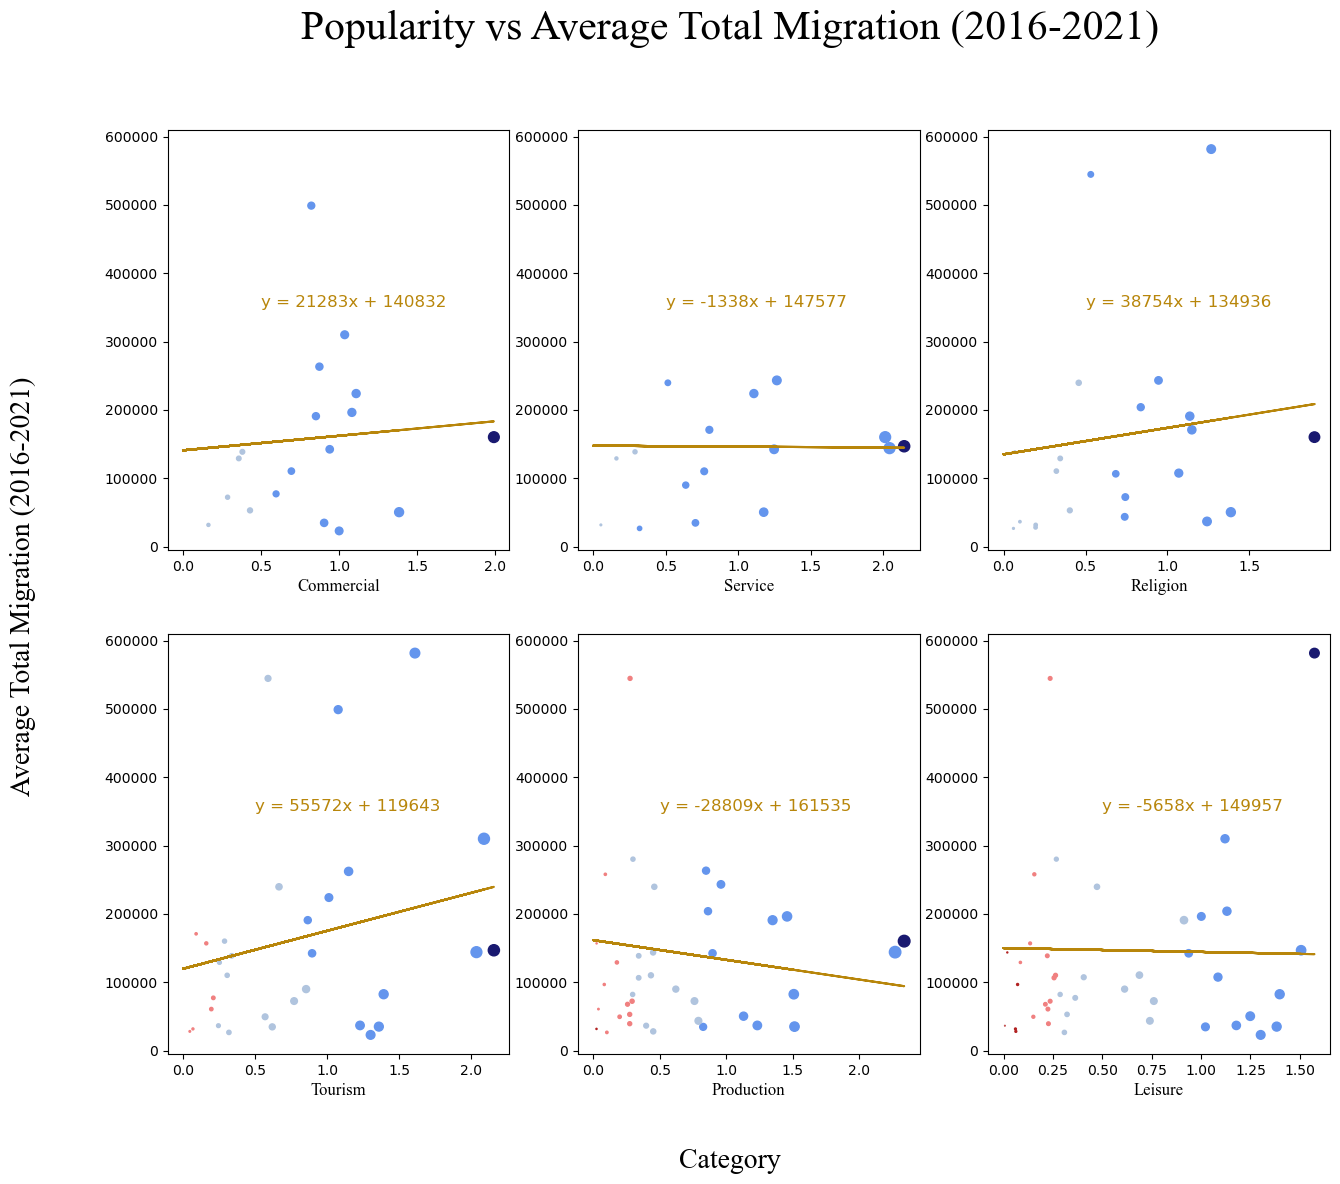

In [160]:
# Create subplots for all categories
fig_census, ax_census = plt.subplots(2, 3, figsize=(15,12))
font_tnr = {'fontname': 'Times New Roman'}
fig_census.suptitle('Popularity vs Average Total Migration (2016-2021)', fontsize=30, **font_tnr)
fig_census.supxlabel('Category', fontsize=20, **font_tnr)
fig_census.supylabel('Average Total Migration (2016-2021)', fontsize=20, **font_tnr)

# Graph the popularity index for each category on the subplot
row_count = 0
col_count = 0
for pop in states_complete_df.columns[2:8]:
    
    # Set dependent and independent variables
    category = states_complete_df[pop]
    migration = states_complete_df['Average Total Migration']

    # Distinguish the color by quartiles and highlight the maximum value
    quartiles = category.quantile([0.25,0.5,0.75])
    colors_census = ['midnightblue' if v == category.max() else 'cornflowerblue' if ((v >= quartiles[0.75]) & (v < category.max())) else 'lightsteelblue' if ((v >= quartiles[0.5]) & (v < quartiles[0.75])) else 'lightcoral' if ((v >= quartiles[0.25]) & (v < quartiles[0.5])) else 'firebrick' for v in category]
    ax_census[row_count, col_count].scatter(category, migration, facecolors=colors_census, s=category*30)
    ax_census[row_count, col_count].set_xlabel(pop.replace("_popularity", "").title(), fontsize=12, **font_tnr)
    
    # Perform linear regression for all subplots and print notable values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(category, migration)
    regress_values = category * slope + intercept
    lin_reg_eq = f"y = {str(round(slope))}x + {str(round(intercept))}"
    ax_census[row_count, col_count].plot(category, regress_values, 'darkgoldenrod')
    ax_census[row_count, col_count].annotate(lin_reg_eq,(0.5, 350000),fontsize=12,color='darkgoldenrod')
    print(f"R-squared: {round((rvalue**2)*100, 4)}% of the variability observed in {pop.replace('_popularity', '').title()} is explained by the regression model.")
    if pvalue < 0.1:
        print(f"P-value of {round(pvalue, 4)} for {pop.replace('_popularity', '').title()} is arguable!")
    print("-"*80)
    
    # Navigate subplot matrix
    col_count += 1
    if col_count == 3:
        col_count = 0
        row_count += 1

plt.savefig('Figures/scatter_popularity_migration.png')
plt.show()